In [155]:
#Importar as bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [156]:
#Comecei carregando o arquivo .csv
#Separador defido por ","
df = pd.read_csv('netflix.csv', sep=",")

#Vamos observar as 5 primeiras linhas do dataset
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [157]:
#Então comecei entendendo a dimensão do dataset, quantas observações e quantas variáveis ele contém
linhas, colunas = df.shape

print('O dataset possui {} observações e {} variáveis.'.format(linhas, colunas))

O dataset possui 8807 observações e 12 variáveis.


In [193]:
#Percebi que existem alguns dados faltantes em "director" então explorei um pouco essa variável
df_null = df['director'].isnull()
df_null.value_counts()

False    6173
True     2634
Name: director, dtype: int64

In [201]:
#Fiz também um percentual de dados faltantes em "director"
df_null_percent = round((df.isnull().sum() / len(df)) * 100)
df_null_percent

show_id          0.0
type             0.0
title            0.0
director        30.0
cast             9.0
country          9.0
date_added       0.0
release_year     0.0
rating           0.0
duration         0.0
listed_in        0.0
description      0.0
dtype: float64

In [158]:
#Explorando o nome das variáveis
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [159]:
#Resumo de informações sobre as variáveis do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [160]:
#Descobrindo os tipos de classificação do dataset
df_type = df['type'].unique()
df_type

array(['Movie', 'TV Show'], dtype=object)

In [161]:
#Agora vamos contar quantos Filmes e quantas Séries esse dataset possui
df_type = df['type'].value_counts()
filmes, series = df_type

print('O dataset possui {} filmes e {} séries.'.format(filmes, series))

O dataset possui 6131 filmes e 2676 séries.


<AxesSubplot:>

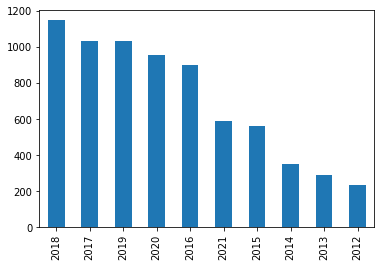

In [162]:
#Quais 10 anos que mais lançaram filmes?
df_launch = df['release_year'].value_counts()
df_launch = df_launch[0:10,]
df_launch.plot.bar()

In [163]:
#Aqui criei um subdataset, filtrado por Filme, para entender mais sobre eles separadamente
df_movie = df[df['type'] == 'Movie']
df_movie = df_movie[['title', 'type', 'duration']]
df_movie

,title,type,duration
0,Dick Johnson Is Dead,Movie,90 min
6,My Little Pony: A New Generation,Movie,91 min
7,Sankofa,Movie,125 min
9,The Starling,Movie,104 min
12,Je Suis Karl,Movie,127 min
...,...,...,...
8801,Zinzana,Movie,96 min
8802,Zodiac,Movie,158 min
8804,Zombieland,Movie,88 min
8805,Zoom,Movie,88 min


In [164]:
#A coluna "duration" continha o minuto após os números, decidi remover para trabalhar apenas com os números
df_movie.replace({' min': ''}, regex=True, inplace=True)
df_movie

,title,type,duration
0,Dick Johnson Is Dead,Movie,90
6,My Little Pony: A New Generation,Movie,91
7,Sankofa,Movie,125
9,The Starling,Movie,104
12,Je Suis Karl,Movie,127
...,...,...,...
8801,Zinzana,Movie,96
8802,Zodiac,Movie,158
8804,Zombieland,Movie,88
8805,Zoom,Movie,88


In [165]:
#Ainda não estava do jeito que eu precisava, alterei o formato da coluna "duration" para "float", ou seja, números decimais
df_movie['duration'] = df_movie['duration'].astype(float)

#Agora é possível obter algumas estatísticas interessantes
df_movie.describe()

,duration
count,6128.000000
mean,99.577187
std,28.290593
min,3.000000
25%,87.000000
50%,98.000000
75%,114.000000
max,312.000000


In [166]:
#Obtendo mais informações, filtrei os filmes com menos de 10 minutos de duração
df_movie1 = df_movie[df_movie['duration'] < 10]
df_movie1

,title,type,duration
1484,Cops and Robbers,Movie,8.0
1557,Canvas,Movie,9.0
2713,Sol Levante,Movie,5.0
3777,Silent,Movie,3.0


In [204]:
#Também filtrei os filmes com mais de 220 minutos de duração
df_movie2 = df_movie[df_movie['duration'] > 220]
df_movie2

,title,type,duration
166,Once Upon a Time in America,Movie,229.0
717,Headspace: Unwind Your Mind,Movie,273.0
1019,Lagaan,Movie,224.0
2484,Lock Your Girls In,Movie,233.0
2487,No Longer kids,Movie,237.0
2488,Raya and Sakina,Movie,230.0
2491,The School of Mischief,Movie,253.0
4253,Black Mirror: Bandersnatch,Movie,312.0
7932,Sangam,Movie,228.0


In [168]:
#Ordenei os filmes pela variável "duration" em ordem crescente
df_movie_asc = df_movie.sort_values(by=['duration'], ascending=True)
df_movie_asc

,title,type,duration
3777,Silent,Movie,3.0
2713,Sol Levante,Movie,5.0
1484,Cops and Robbers,Movie,8.0
1557,Canvas,Movie,9.0
3535,American Factory: A Conversation with the Obamas,Movie,10.0
...,...,...,...
717,Headspace: Unwind Your Mind,Movie,273.0
4253,Black Mirror: Bandersnatch,Movie,312.0
5541,Louis C.K. 2017,Movie,NaN
5794,Louis C.K.: Hilarious,Movie,NaN


In [169]:
#Ordenei os filmes pela variável "duration" em ordem decrescente
df_movie_desc = df_movie.sort_values(by=['duration'], ascending=False)
df_movie_desc

,title,type,duration
4253,Black Mirror: Bandersnatch,Movie,312.0
717,Headspace: Unwind Your Mind,Movie,273.0
2491,The School of Mischief,Movie,253.0
2487,No Longer kids,Movie,237.0
2484,Lock Your Girls In,Movie,233.0
...,...,...,...
2713,Sol Levante,Movie,5.0
3777,Silent,Movie,3.0
5541,Louis C.K. 2017,Movie,NaN
5794,Louis C.K.: Hilarious,Movie,NaN


In [170]:
#Do mesmo modo que apliquei para os filmes, fiz para as séries, criei um subdataset
df_shows = df[df['type'] == 'TV Show']
df_shows = df_shows[['title', 'type', 'duration']]
df_shows

,title,type,duration
1,Blood & Water,TV Show,2 Seasons
2,Ganglands,TV Show,1 Season
3,Jailbirds New Orleans,TV Show,1 Season
4,Kota Factory,TV Show,2 Seasons
5,Midnight Mass,TV Show,1 Season
...,...,...,...
8795,Yu-Gi-Oh! Arc-V,TV Show,2 Seasons
8796,Yunus Emre,TV Show,2 Seasons
8797,Zak Storm,TV Show,3 Seasons
8800,Zindagi Gulzar Hai,TV Show,1 Season


In [171]:
#Removi da coluna "duration" as palavras "Season" e "Seasons" deixando apenas o número referente a quantidade de temporadas
df_shows.replace({' Seasons': ''}, regex=True, inplace=True)
df_shows.replace({' Season': ''}, regex=True, inplace=True)
df_shows

,title,type,duration
1,Blood & Water,TV Show,2
2,Ganglands,TV Show,1
3,Jailbirds New Orleans,TV Show,1
4,Kota Factory,TV Show,2
5,Midnight Mass,TV Show,1
...,...,...,...
8795,Yu-Gi-Oh! Arc-V,TV Show,2
8796,Yunus Emre,TV Show,2
8797,Zak Storm,TV Show,3
8800,Zindagi Gulzar Hai,TV Show,1


In [172]:
#Alterei também o formato da coluna "duration" para "float", ou seja, números decimais
df_shows['duration'] = df_shows['duration'].astype(float)

#Agora é possível obter algumas estatísticas interessantes
df_shows.describe()

,duration
count,2676.000000
mean,1.764948
std,1.582752
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,17.000000


In [173]:
#Quantas das séries listadas possuem até 2 temporadas?
df_shows2 = df_shows[df_shows['duration'] <= 2]
df_shows2['duration'].value_counts()

1.0    1793
2.0     425
Name: duration, dtype: int64